In [ ]:
!pip install imbalanced-learn
#!pip install catboost
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import ClusterCentroids
#from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/KOI_filtered.csv')

knn_imputer = KNNImputer(n_neighbors=5)

# Apply the imputer on your dataset
# Assuming all columns are numeric or that you've preprocessed categorical columns
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Map 'falsepositive' to 0 and 'confirmed' to 1 in the target column
df_imputed['koi_disposition'] = df_imputed['koi_disposition'].map({'FALSEPOSITIVE': 0, 'CONFIRMED': 1})

# Separate features and target if applicable, e.g., if 'target_column' is your label column
# If you don't have a target, you can skip this step
X = df_imputed.drop('koi_disposition', axis=1)  # Replace 'target_column' with your actual target column name
y = df_imputed['koi_disposition']  # Replace 'target_column' with your actual target column name

# Perform the train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)

# Optionally, save the train and test sets to new CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('Y_train.csv', index=False)
y_test.to_csv('Y_test.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/KOI_filtered.csv'

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('your_file.csv')

# Map 'falsepositive' to 0 and 'confirmed' to 1 in the target column
df['koi_disposition'] = df['koi_disposition'].map({'FALSEPOSITIVE': 0, 'CONFIRMED': 1})

# Save the updated DataFrame to a new CSV file (optional)
df.to_csv('updated_file.csv', index=False)

# Or, you can proceed with your train-test split afterward


In [ ]:
import pandas as pd

# Load the CSV files
X_train_df = pd.read_csv('X_train.csv')
Y_train_df = pd.read_csv('Y_train.csv')
X_test_df = pd.read_csv('X_test.csv')
Y_test_df = pd.read_csv('Y_test.csv')

# Convert the DataFrames to NumPy arrays
X_train = X_train_df.to_numpy()
Y_train = Y_train_df.to_numpy().ravel()  # Flatten to a 1D array
X_test = X_test_df.to_numpy()
Y_test = Y_test_df.to_numpy().ravel()    # Flatten to a 1D array


In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
pipeline = ImbPipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('oversample', ADASYN()),
    ('classifier', XGBClassifier())
])

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1')
print(f'Average F1 score across folds: {cv_scores.mean()}')

Learning rate set to 0.017131
0:	learn: 0.6776827	total: 51.8ms	remaining: 51.8s
1:	learn: 0.6642748	total: 55.6ms	remaining: 27.7s
2:	learn: 0.6510655	total: 59.2ms	remaining: 19.7s
3:	learn: 0.6361153	total: 65.1ms	remaining: 16.2s
4:	learn: 0.6233632	total: 68.9ms	remaining: 13.7s
5:	learn: 0.6120874	total: 72.4ms	remaining: 12s
6:	learn: 0.5999096	total: 76ms	remaining: 10.8s
7:	learn: 0.5895094	total: 79.5ms	remaining: 9.86s
8:	learn: 0.5794305	total: 83.2ms	remaining: 9.16s
9:	learn: 0.5689796	total: 86.8ms	remaining: 8.59s
10:	learn: 0.5576747	total: 90.3ms	remaining: 8.12s
11:	learn: 0.5479671	total: 94ms	remaining: 7.74s
12:	learn: 0.5383987	total: 97.6ms	remaining: 7.41s
13:	learn: 0.5288233	total: 101ms	remaining: 7.14s
14:	learn: 0.5207244	total: 106ms	remaining: 6.98s
15:	learn: 0.5111564	total: 110ms	remaining: 6.76s
16:	learn: 0.5031263	total: 114ms	remaining: 6.56s
17:	learn: 0.4958793	total: 117ms	remaining: 6.4s
18:	learn: 0.4886150	total: 121ms	remaining: 6.25s
19:	l

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['CONFIRMED' 'FALSE POSITIVE']

  warnings.warn(


Learning rate set to 0.017135
0:	learn: 0.6788235	total: 18.1ms	remaining: 18.1s
1:	learn: 0.6642035	total: 24.3ms	remaining: 12.1s
2:	learn: 0.6506171	total: 33.7ms	remaining: 11.2s
3:	learn: 0.6357585	total: 41.8ms	remaining: 10.4s
4:	learn: 0.6225012	total: 52.2ms	remaining: 10.4s
5:	learn: 0.6109280	total: 60.8ms	remaining: 10.1s
6:	learn: 0.5994601	total: 70.1ms	remaining: 9.95s
7:	learn: 0.5890157	total: 80ms	remaining: 9.92s
8:	learn: 0.5787999	total: 90.1ms	remaining: 9.92s
9:	learn: 0.5681031	total: 97.2ms	remaining: 9.63s
10:	learn: 0.5571990	total: 106ms	remaining: 9.53s
11:	learn: 0.5472707	total: 115ms	remaining: 9.49s
12:	learn: 0.5375474	total: 124ms	remaining: 9.44s
13:	learn: 0.5274340	total: 133ms	remaining: 9.4s
14:	learn: 0.5181085	total: 145ms	remaining: 9.52s
15:	learn: 0.5096138	total: 154ms	remaining: 9.5s
16:	learn: 0.5015918	total: 165ms	remaining: 9.55s
17:	learn: 0.4939550	total: 171ms	remaining: 9.35s
18:	learn: 0.4857589	total: 181ms	remaining: 9.36s
19:	l

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['CONFIRMED' 'FALSE POSITIVE']

  warnings.warn(


Learning rate set to 0.017135
0:	learn: 0.6778551	total: 3.56ms	remaining: 3.56s
1:	learn: 0.6641950	total: 7.36ms	remaining: 3.67s
2:	learn: 0.6504747	total: 10.9ms	remaining: 3.63s
3:	learn: 0.6348315	total: 14.5ms	remaining: 3.62s
4:	learn: 0.6216763	total: 18.3ms	remaining: 3.64s
5:	learn: 0.6092834	total: 22ms	remaining: 3.64s
6:	learn: 0.5987977	total: 25.6ms	remaining: 3.63s
7:	learn: 0.5890300	total: 29.2ms	remaining: 3.63s
8:	learn: 0.5786397	total: 34.8ms	remaining: 3.83s
9:	learn: 0.5681107	total: 39.9ms	remaining: 3.94s
10:	learn: 0.5578983	total: 43.7ms	remaining: 3.93s
11:	learn: 0.5479372	total: 47.3ms	remaining: 3.9s
12:	learn: 0.5375752	total: 50.9ms	remaining: 3.86s
13:	learn: 0.5287748	total: 54.6ms	remaining: 3.84s
14:	learn: 0.5193201	total: 58.4ms	remaining: 3.83s
15:	learn: 0.5103670	total: 61.9ms	remaining: 3.81s
16:	learn: 0.5022862	total: 65.7ms	remaining: 3.8s
17:	learn: 0.4951266	total: 69.4ms	remaining: 3.79s
18:	learn: 0.4874332	total: 73.2ms	remaining: 3.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['CONFIRMED' 'FALSE POSITIVE']

  warnings.warn(


Learning rate set to 0.017135
0:	learn: 0.6798201	total: 3.6ms	remaining: 3.6s
1:	learn: 0.6655928	total: 6.95ms	remaining: 3.47s
2:	learn: 0.6507184	total: 10.3ms	remaining: 3.41s
3:	learn: 0.6356727	total: 13.5ms	remaining: 3.36s
4:	learn: 0.6235688	total: 16.9ms	remaining: 3.37s
5:	learn: 0.6115352	total: 20.6ms	remaining: 3.42s
6:	learn: 0.6014244	total: 24.3ms	remaining: 3.44s
7:	learn: 0.5907518	total: 27.8ms	remaining: 3.45s
8:	learn: 0.5793497	total: 31.4ms	remaining: 3.46s
9:	learn: 0.5693469	total: 35ms	remaining: 3.46s
10:	learn: 0.5595101	total: 38.5ms	remaining: 3.46s
11:	learn: 0.5495368	total: 42.2ms	remaining: 3.48s
12:	learn: 0.5392888	total: 45.8ms	remaining: 3.47s
13:	learn: 0.5301566	total: 49.4ms	remaining: 3.48s
14:	learn: 0.5211247	total: 53.1ms	remaining: 3.49s
15:	learn: 0.5128884	total: 58.8ms	remaining: 3.62s
16:	learn: 0.5050752	total: 63.7ms	remaining: 3.68s
17:	learn: 0.4979153	total: 67ms	remaining: 3.65s
18:	learn: 0.4908408	total: 70.5ms	remaining: 3.64

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['CONFIRMED' 'FALSE POSITIVE']

  warnings.warn(


Learning rate set to 0.017131
0:	learn: 0.6751971	total: 3.58ms	remaining: 3.57s
1:	learn: 0.6617763	total: 7.39ms	remaining: 3.69s
2:	learn: 0.6482288	total: 11.3ms	remaining: 3.75s
3:	learn: 0.6343897	total: 15.1ms	remaining: 3.77s
4:	learn: 0.6205726	total: 18.7ms	remaining: 3.72s
5:	learn: 0.6097073	total: 22.3ms	remaining: 3.69s
6:	learn: 0.5983460	total: 25.8ms	remaining: 3.65s
7:	learn: 0.5872887	total: 29.2ms	remaining: 3.62s
8:	learn: 0.5753570	total: 32.8ms	remaining: 3.62s
9:	learn: 0.5626654	total: 36.4ms	remaining: 3.6s
10:	learn: 0.5525965	total: 40ms	remaining: 3.59s
11:	learn: 0.5424111	total: 43.6ms	remaining: 3.59s
12:	learn: 0.5321436	total: 47.1ms	remaining: 3.58s
13:	learn: 0.5225275	total: 50.6ms	remaining: 3.56s
14:	learn: 0.5139882	total: 54.3ms	remaining: 3.56s
15:	learn: 0.5056863	total: 57.8ms	remaining: 3.56s
16:	learn: 0.4975583	total: 61.4ms	remaining: 3.55s
17:	learn: 0.4903246	total: 64.9ms	remaining: 3.54s
18:	learn: 0.4830452	total: 68.4ms	remaining: 3

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['CONFIRMED' 'FALSE POSITIVE']

  warnings.warn(


In [ ]:
pipeline.fit(X_train, Y_train)



Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('oversample', ADASYN()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:

y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

conf_matrix = confusion_matrix(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nF1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
[[1068  142]
 [  57  629]]

F1 Score: 0.8634179821551132
Precision: 0.8158236057068742
Recall: 0.9169096209912536


In [ ]:
from joblib import dump, load

# Assuming `pipeline` is your pipeline that includes the CatBoost model
dump(pipeline, 'XGboost(ADASIN.joblib')

['pipeline_with_catboost.joblib']

In [26]:
confirmed_df = pd.read_csv('/content/confirmed_rows.csv')

# Convert the DataFrames to NumPy arrays
confirmed = confirmed_df.to_numpy()

In [27]:
from joblib import load

# Load the CatBoost model
pipeline = load('/content/XGboost(ADASIN).joblib')

# Now the model can be used for predictions or further evaluation
predictict = pipeline.predict(confirmed)

In [28]:
predictict


array([1, 1, 1, ..., 1, 1, 1])

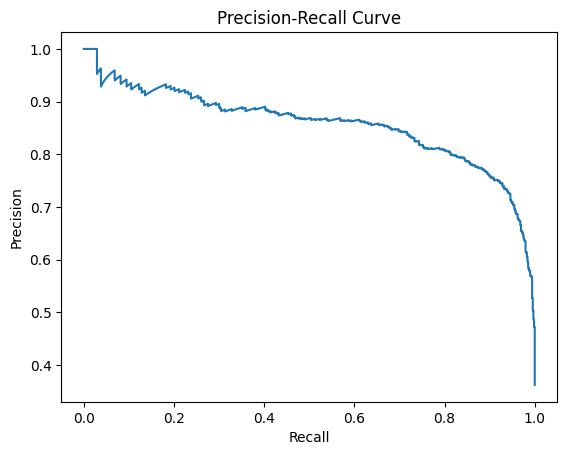

In [ ]:
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_prob)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
CatBoostClassifier(
        loss_function='CrossEntropy',
        bootstrap_type='MVS',
        eval_metric='F1',
        iterations=319,
        depth=6,
        learning_rate=0.05,
        random_seed=42,
        verbose=100,
    )